In [10]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import numpy as np
import logging

from utils.metrics import Metrics
from utils.utils import convertModel
from models.model import Model
from fer2013_dataset import FER2013Dataset

from utils.backprop import Backprop

from utils.viz import visualize_kernels, visualize_feature_maps
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

logging.disable(logging.CRITICAL)


## Load Untrained Model and visualize saliency and feature maps

In [12]:
# Number of samples to display for image related visualizations!
view_samples = 10

device = torch.device("cpu")

test_dataset = FER2013Dataset("data/fer2013/fer2013/fer2013.csv", "PrivateTest")

test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True, pin_memory=True)

model = Model("./config/kernelSize_exp/75kernel.json")

model.eval()

['Training' 'PublicTest' 'PrivateTest']


Model(
  (network): ModuleList(
    (0): ConvBlock(
      (conv): Conv2d(1, 32, kernel_size=(7, 7), stride=(1, 1), padding=(6, 6))
      (normalization): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): ReLU(inplace=True)
    )
    (1): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(4, 4))
      (normalization): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): ReLU(inplace=True)
      (pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): ConvBlock(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
      (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): ReLU(inplace=True)
    )
    (3): ConvBlock(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (normalization): BatchNorm2

In [13]:
backprop = Backprop(model)

Registered Hook at: {} Conv2d(1, 32, kernel_size=(7, 7), stride=(1, 1), padding=(6, 6))


## Saliency Map visualize by backpropagating target class to the first conv layer

/repos/MSAI/ComputerVision-KEN4255/Emotion-Recognition/utils/backprop.py:100: UserWarning: The predicted class index 1 does notequal the target class index 4. Calculating the gradient w.r.t. the predicted class.
  'Calculating the gradient w.r.t. the predicted class.'


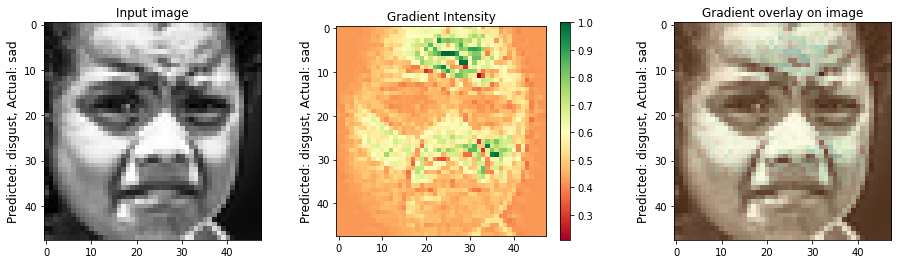

/repos/MSAI/ComputerVision-KEN4255/Emotion-Recognition/utils/backprop.py:100: UserWarning: The predicted class index 1 does notequal the target class index 5. Calculating the gradient w.r.t. the predicted class.
  'Calculating the gradient w.r.t. the predicted class.'


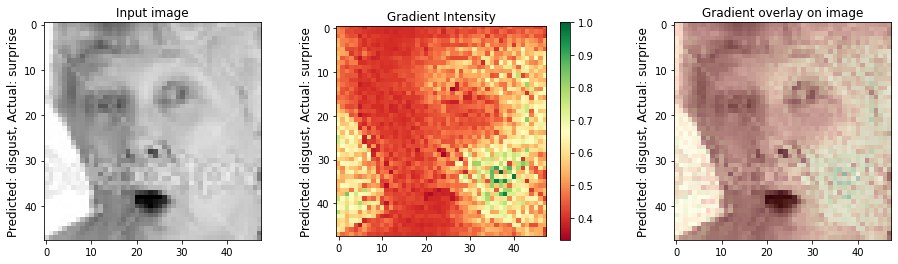

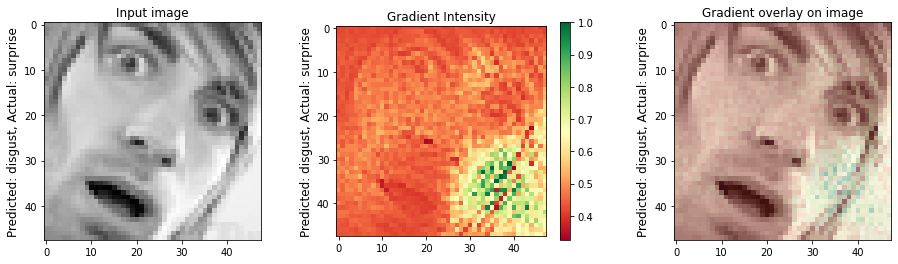

/repos/MSAI/ComputerVision-KEN4255/Emotion-Recognition/utils/backprop.py:100: UserWarning: The predicted class index 1 does notequal the target class index 0. Calculating the gradient w.r.t. the predicted class.
  'Calculating the gradient w.r.t. the predicted class.'


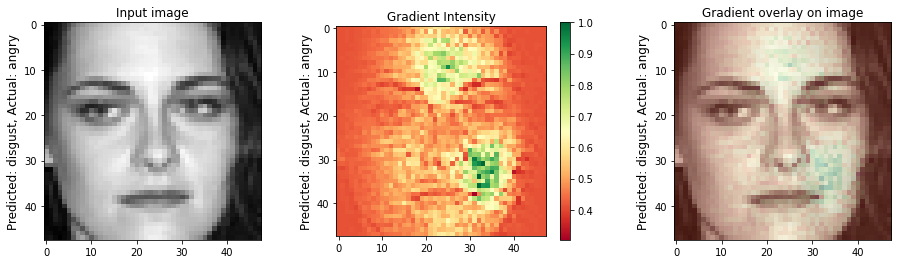

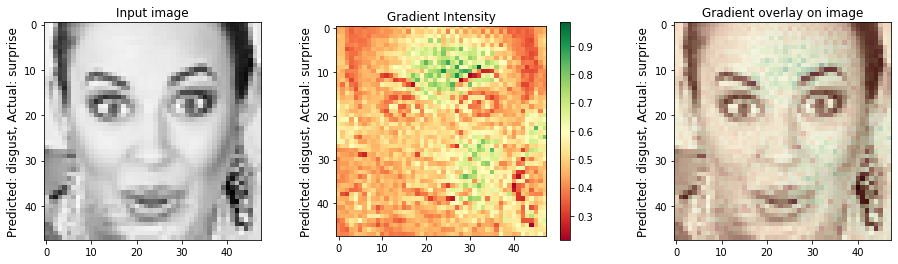

/repos/MSAI/ComputerVision-KEN4255/Emotion-Recognition/utils/backprop.py:100: UserWarning: The predicted class index 1 does notequal the target class index 6. Calculating the gradient w.r.t. the predicted class.
  'Calculating the gradient w.r.t. the predicted class.'


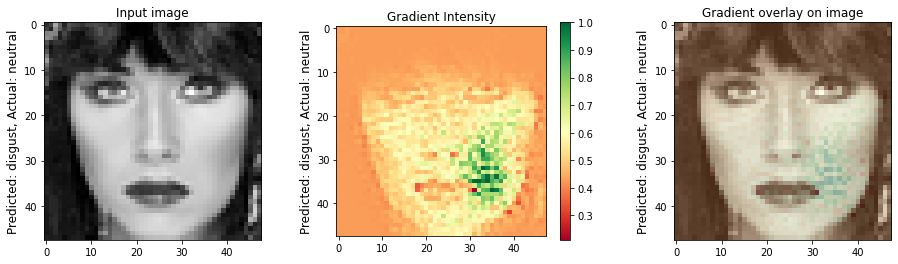

/repos/MSAI/ComputerVision-KEN4255/Emotion-Recognition/utils/backprop.py:100: UserWarning: The predicted class index 1 does notequal the target class index 3. Calculating the gradient w.r.t. the predicted class.
  'Calculating the gradient w.r.t. the predicted class.'


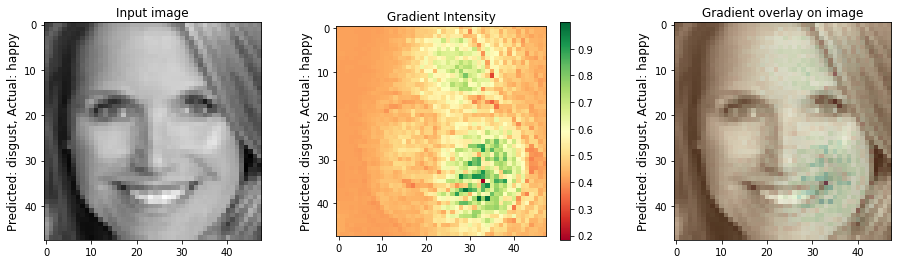

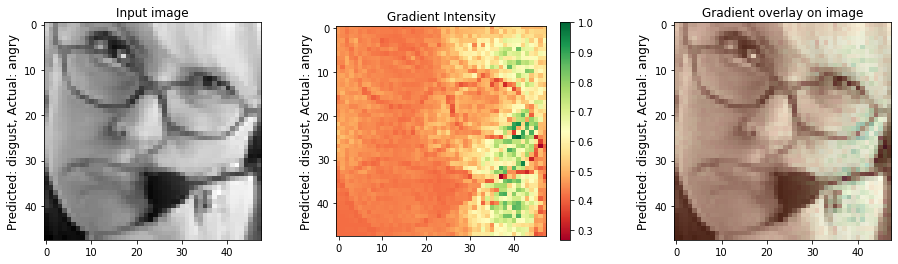

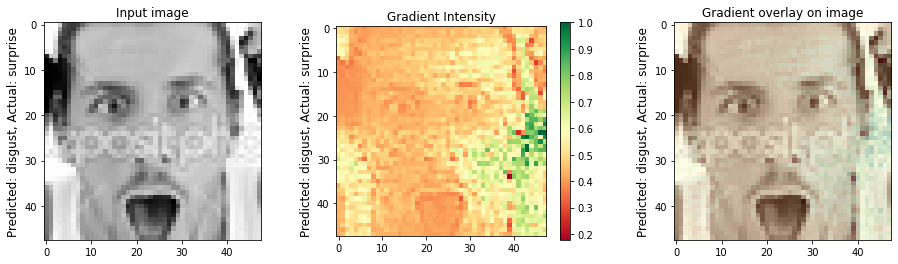

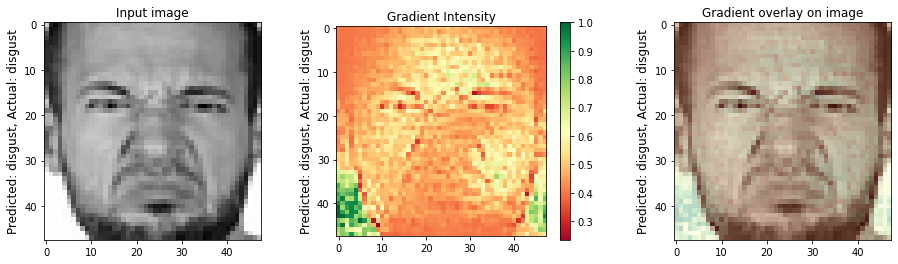

/repos/MSAI/ComputerVision-KEN4255/Emotion-Recognition/utils/backprop.py:100: UserWarning: The predicted class index 1 does notequal the target class index 2. Calculating the gradient w.r.t. the predicted class.
  'Calculating the gradient w.r.t. the predicted class.'


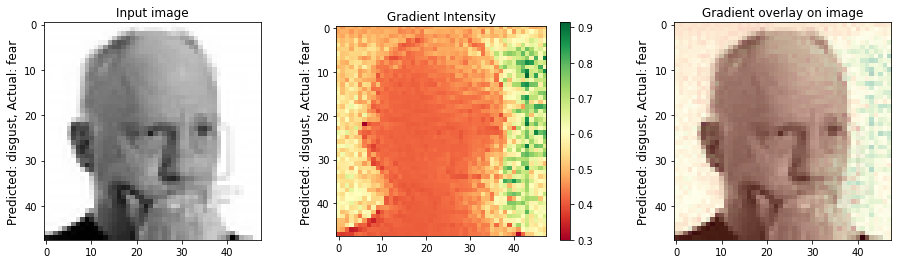

In [14]:
for idx, batch in enumerate(test_loader):
    image, target = batch["image"].to(device), batch["emotion"].to(device)
    image.requires_grad = True
    backprop.visualize(image, target.item(), cmap='RdYlGn', guided=True, alpha=0.3, class_mapping=test_dataset.get_class_mapping())
    if idx == view_samples:
        break

## Visualize Feature Maps

Conv2d(1, 32, kernel_size=(7, 7), stride=(1, 1), padding=(6, 6))
conv1
Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(4, 4))
conv2
Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
conv3
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
conv4


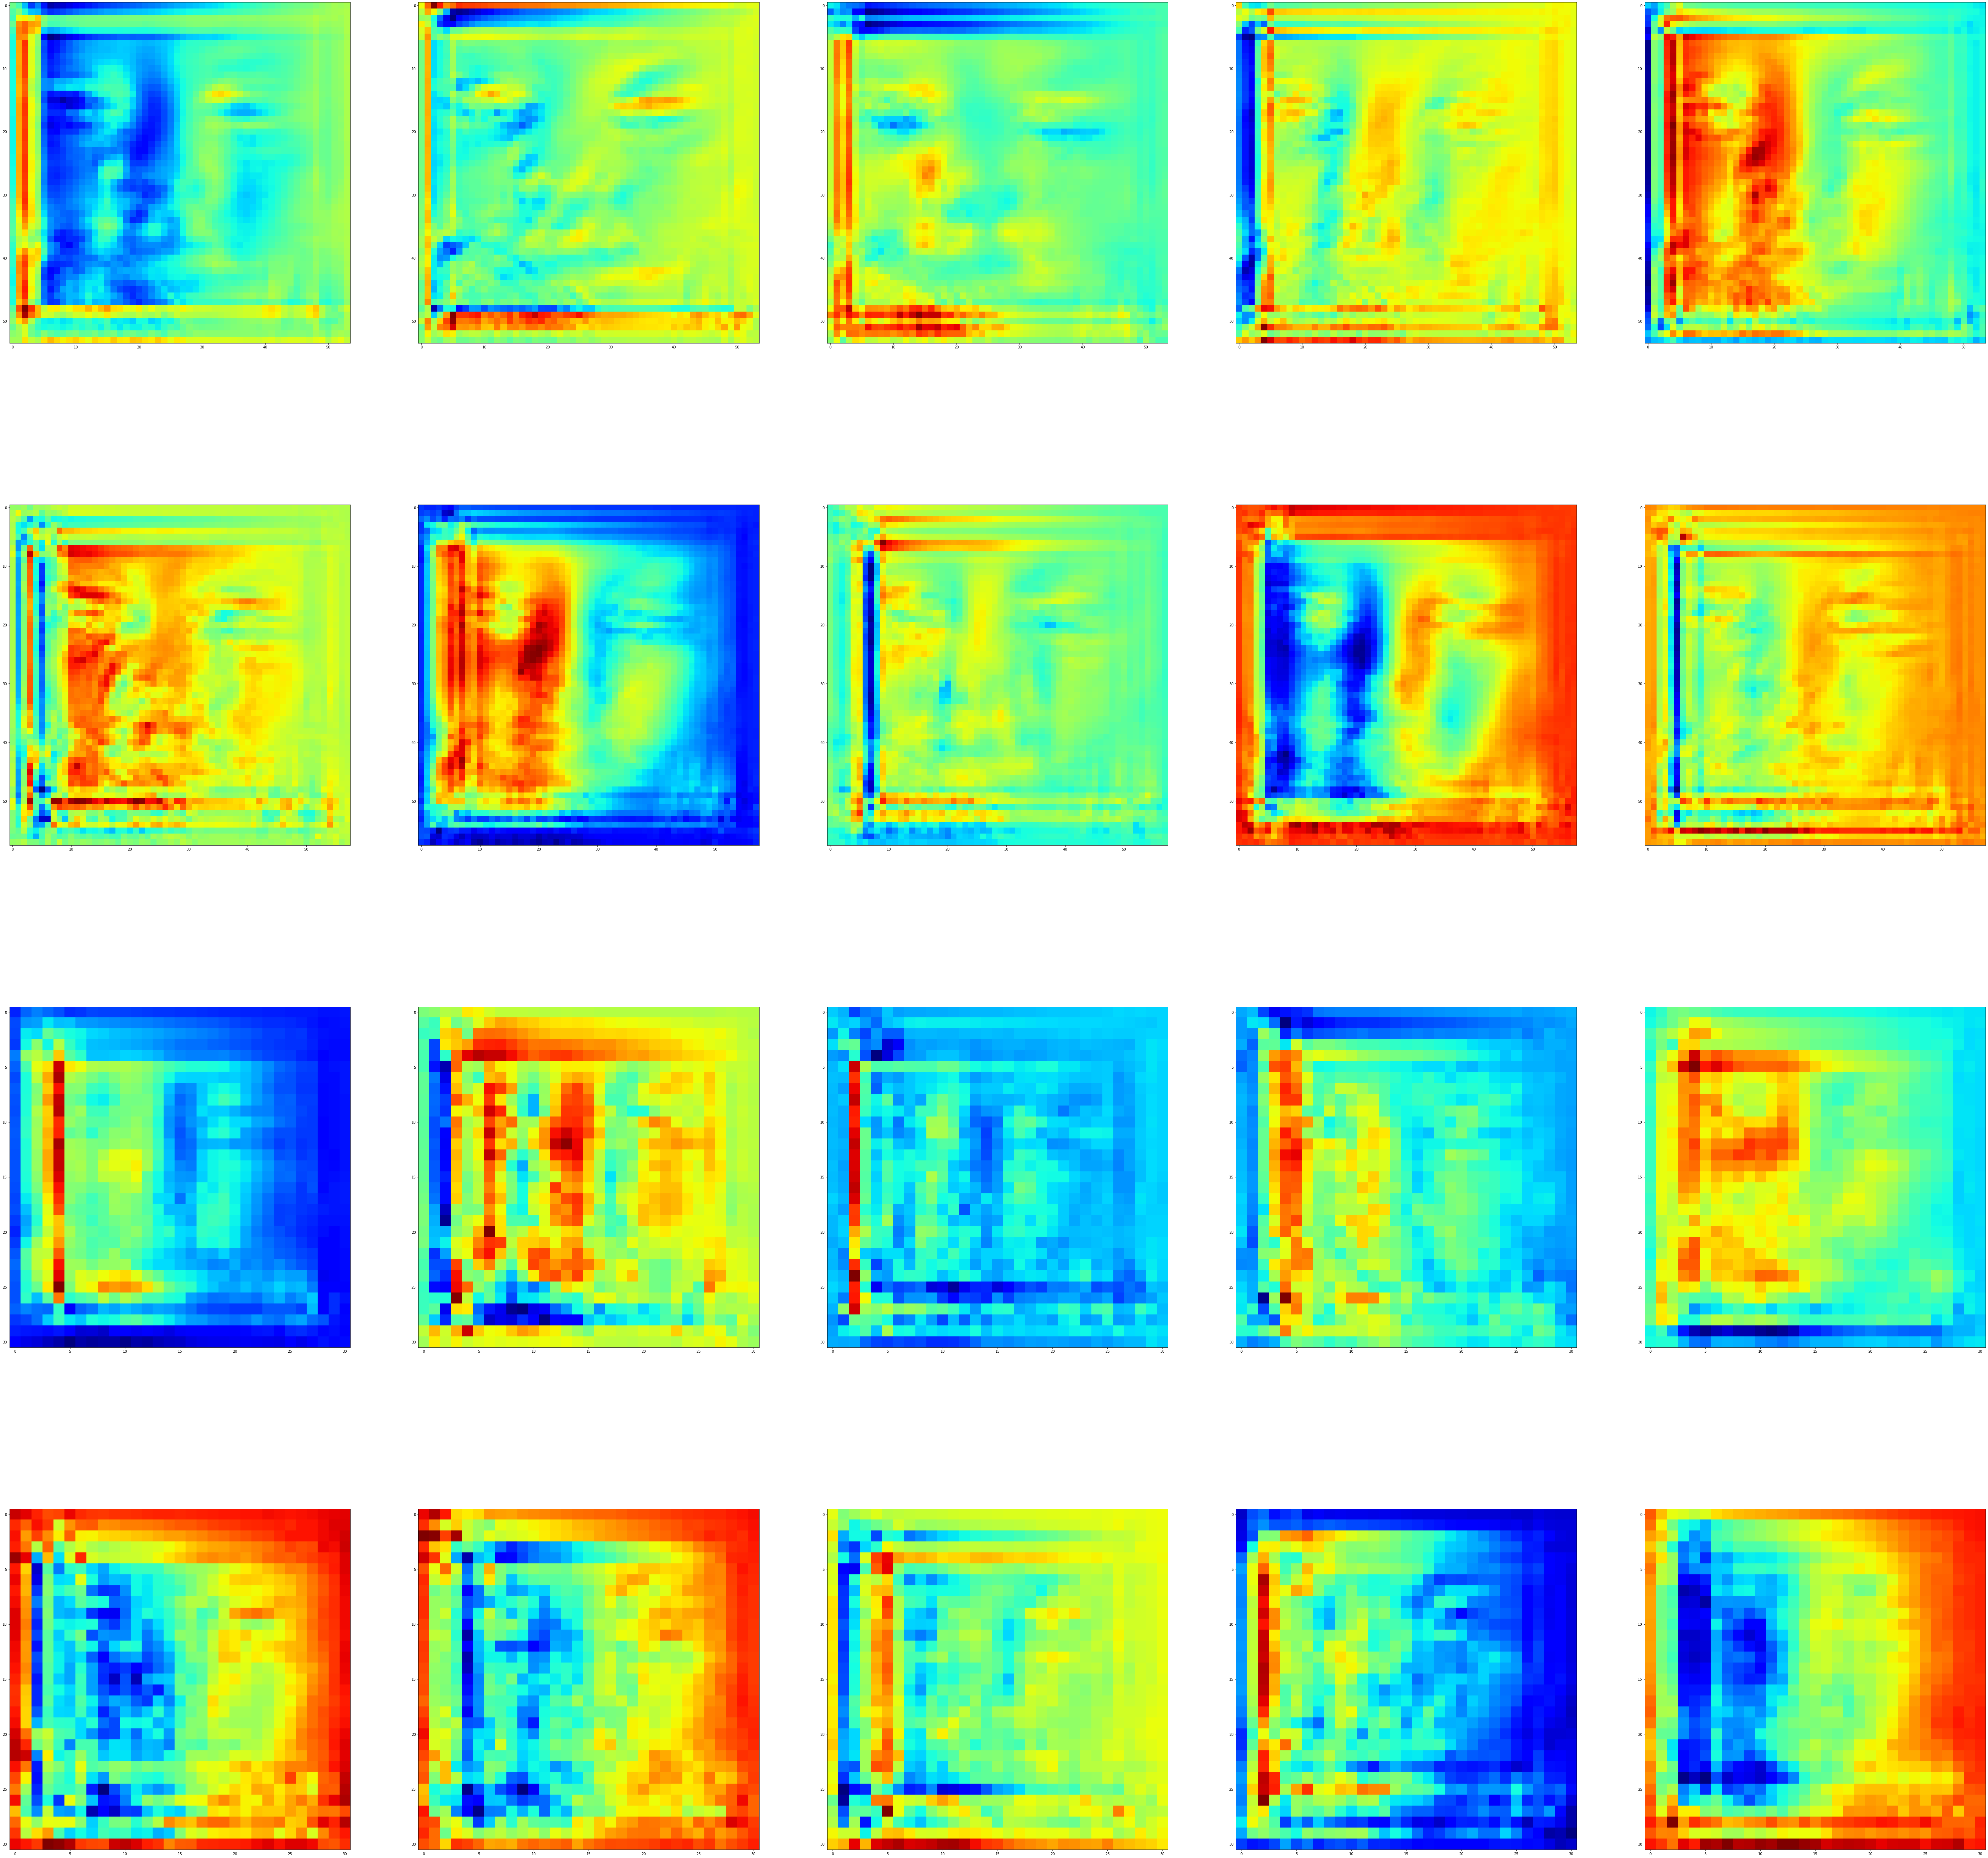

In [15]:
import matplotlib.pyplot as plt

activation = visualize_feature_maps(model.modules())

batch = next(iter(test_loader))
image, target = batch["image"].to(device), batch["emotion"].to(device)
out = model(image)
fig, axarr = plt.subplots(len(activation), 5, figsize=(100, 100))

for convidx, act in enumerate(activation):
    act = activation[act].squeeze()
    for idx in range(5):
        axarr[convidx, idx].imshow(act[idx], cmap='jet')

## Load Trained Model

In [16]:
model = convertModel("saved_models/75kernel.pth.tar", model).to(device)


model.eval()

dict_keys(['state', 'param_groups'])
Loaded Model: saved_models/75kernel.pth.tar successfully


Model(
  (network): ModuleList(
    (0): ConvBlock(
      (conv): Conv2d(1, 32, kernel_size=(7, 7), stride=(1, 1), padding=(6, 6))
      (normalization): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): ReLU(inplace=True)
    )
    (1): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(4, 4))
      (normalization): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): ReLU(inplace=True)
      (pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): ConvBlock(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
      (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): ReLU(inplace=True)
    )
    (3): ConvBlock(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (normalization): BatchNorm2

Registered Hook at: {} Conv2d(1, 32, kernel_size=(7, 7), stride=(1, 1), padding=(6, 6))


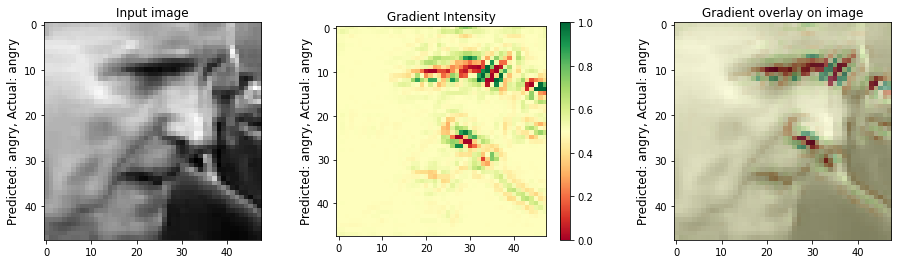

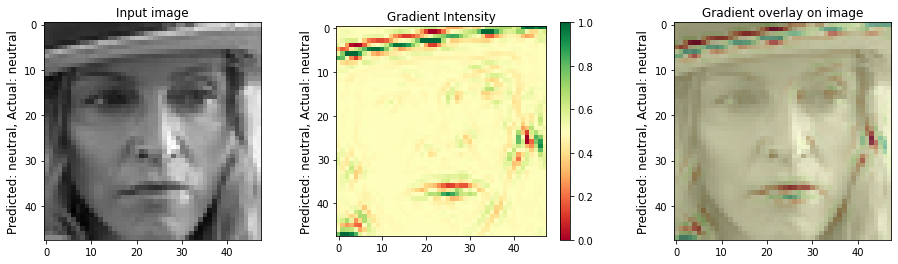

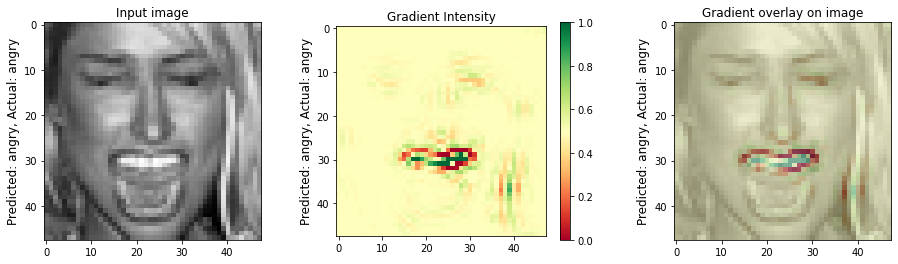

/repos/MSAI/ComputerVision-KEN4255/Emotion-Recognition/utils/backprop.py:100: UserWarning: The predicted class index 0 does notequal the target class index 4. Calculating the gradient w.r.t. the predicted class.
  'Calculating the gradient w.r.t. the predicted class.'


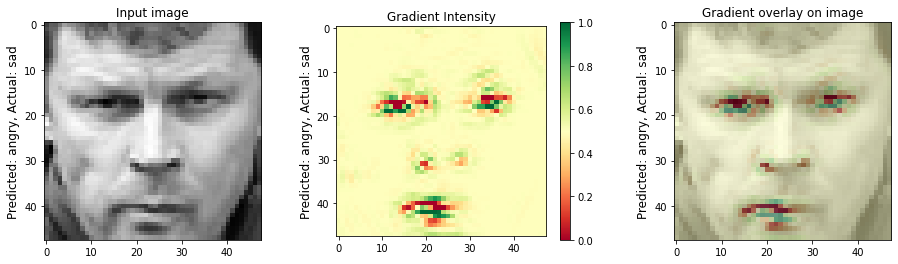

/repos/MSAI/ComputerVision-KEN4255/Emotion-Recognition/utils/backprop.py:100: UserWarning: The predicted class index 0 does notequal the target class index 6. Calculating the gradient w.r.t. the predicted class.
  'Calculating the gradient w.r.t. the predicted class.'


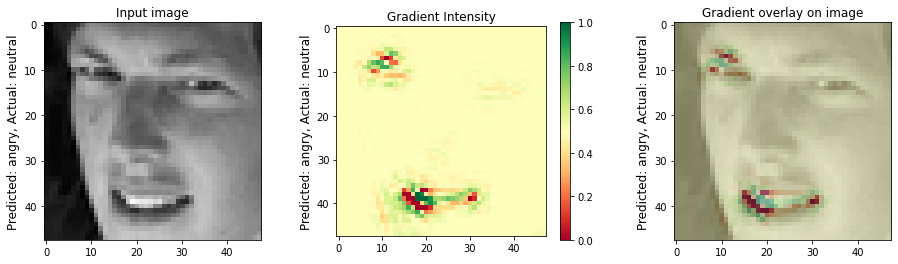

/repos/MSAI/ComputerVision-KEN4255/Emotion-Recognition/utils/backprop.py:100: UserWarning: The predicted class index 4 does notequal the target class index 0. Calculating the gradient w.r.t. the predicted class.
  'Calculating the gradient w.r.t. the predicted class.'


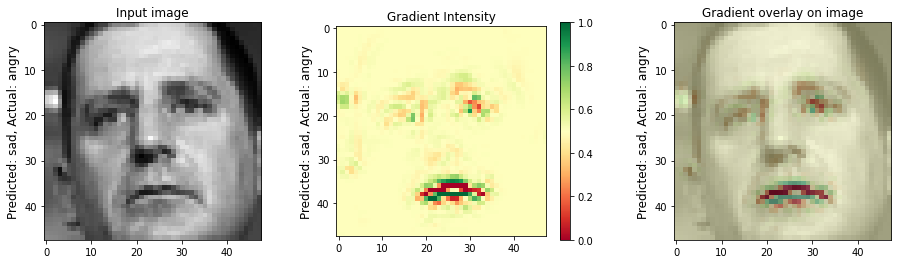

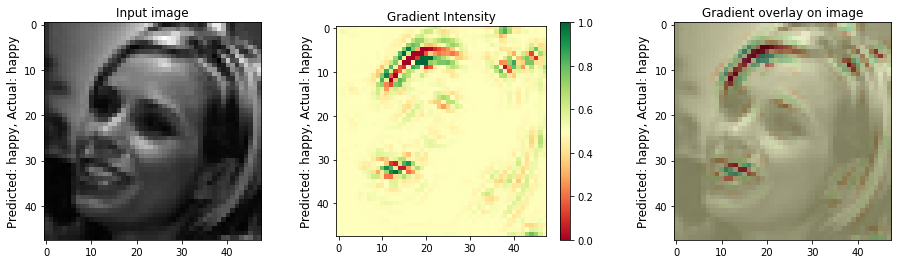

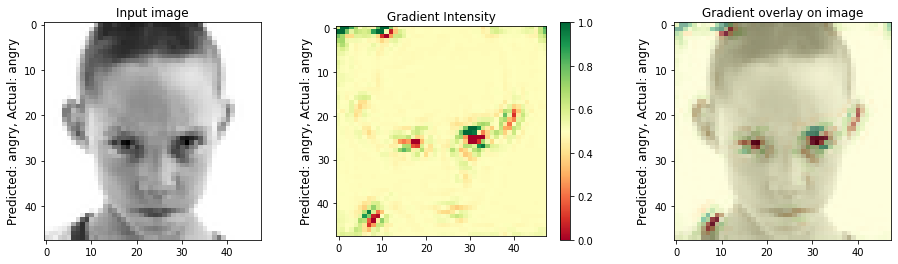

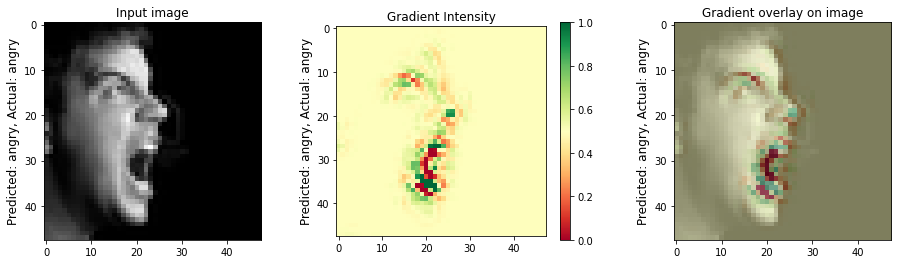

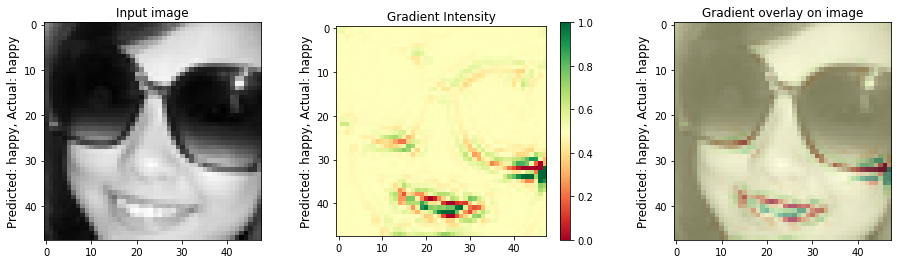

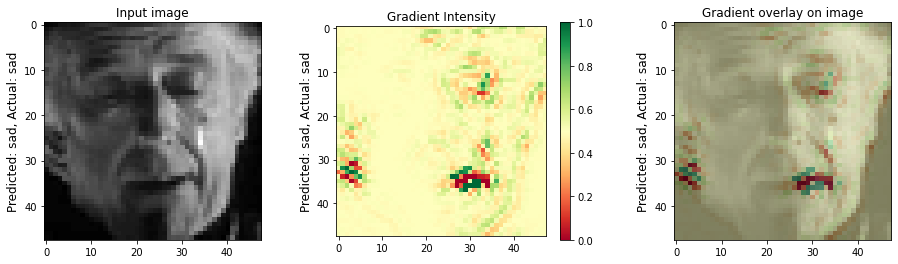

In [17]:
backprop = Backprop(model)
for idx, batch in enumerate(test_loader):
    image, target = batch["image"].to(device), batch["emotion"].to(device)
    image.requires_grad = True
    backprop.visualize(image, target.item(), cmap='RdYlGn', guided=True, alpha=0.5, class_mapping=test_dataset.get_class_mapping())
    if idx == view_samples:
        break

Conv2d(1, 32, kernel_size=(7, 7), stride=(1, 1), padding=(6, 6))
conv1
Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(4, 4))
conv2
Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
conv3
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
conv4


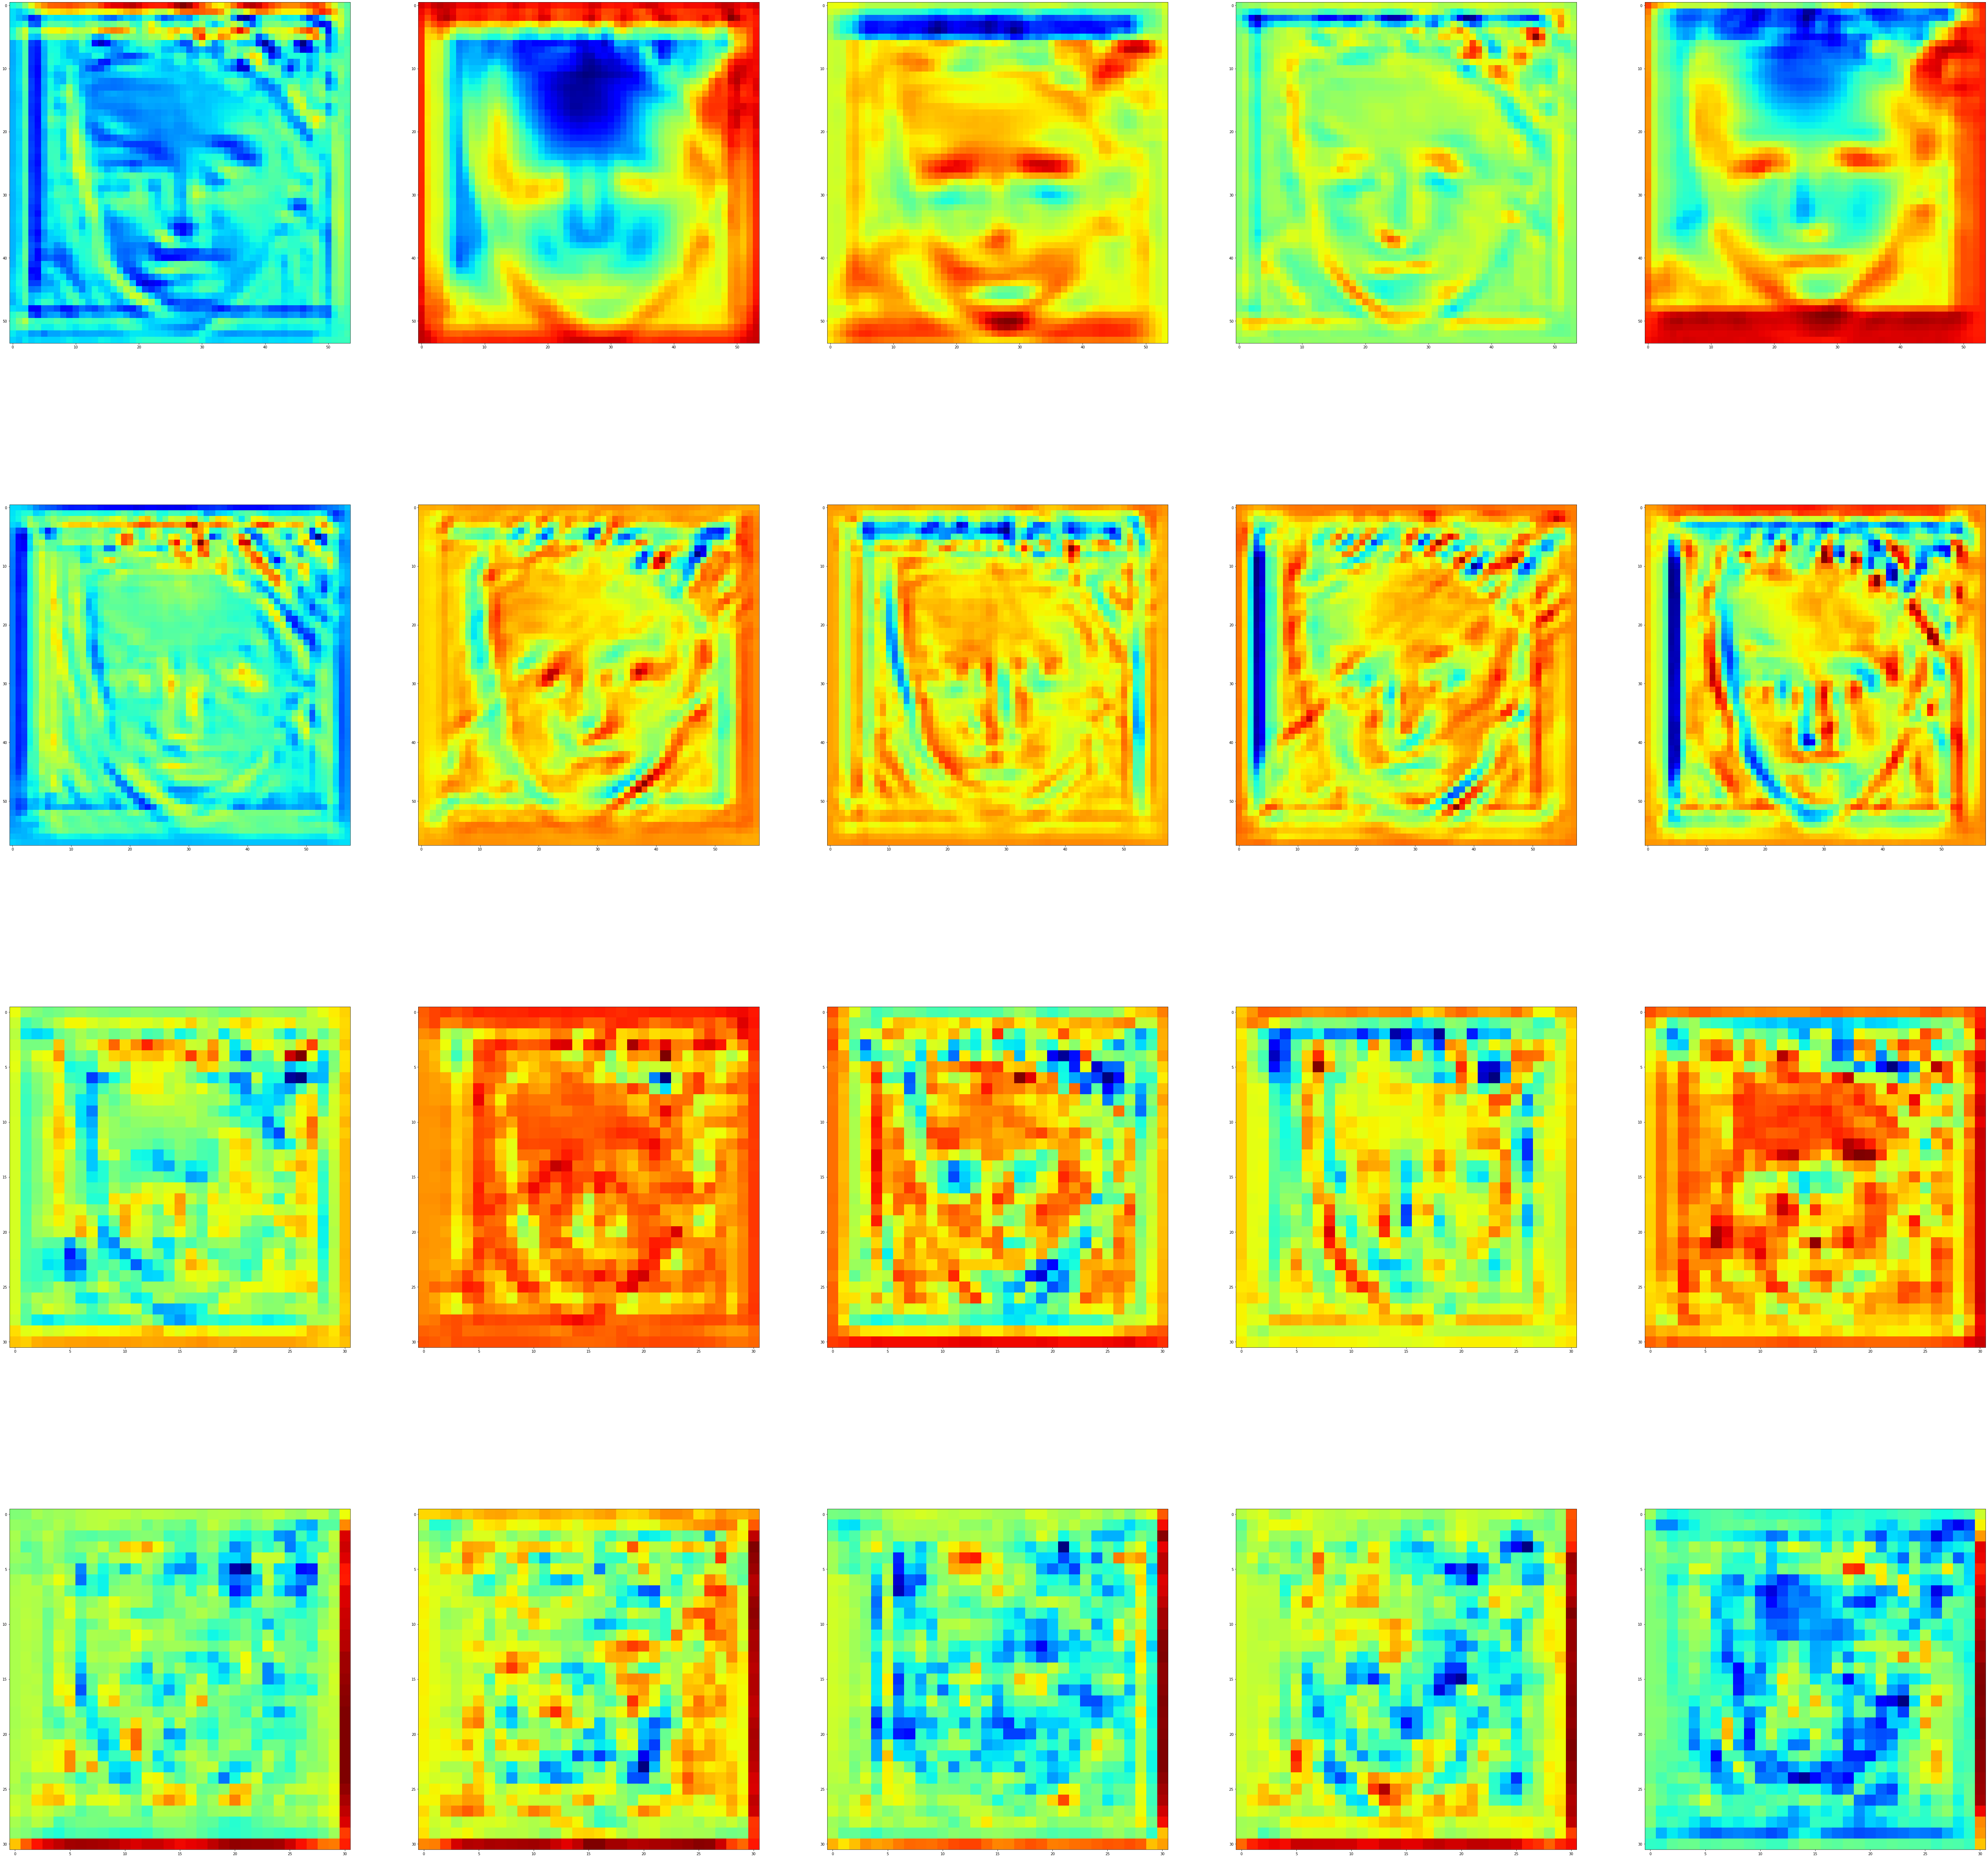

In [18]:
import matplotlib.pyplot as plt

activation = visualize_feature_maps(model.modules())

batch = next(iter(test_loader))
image, target = batch["image"].to(device), batch["emotion"].to(device)
out = model(image)
fig, axarr = plt.subplots(len(activation), 5, figsize=(100, 100))

for convidx, act in enumerate(activation):
    act = activation[act].squeeze()
    for idx in range(5):
        axarr[convidx, idx].imshow(act[idx], cmap='jet')

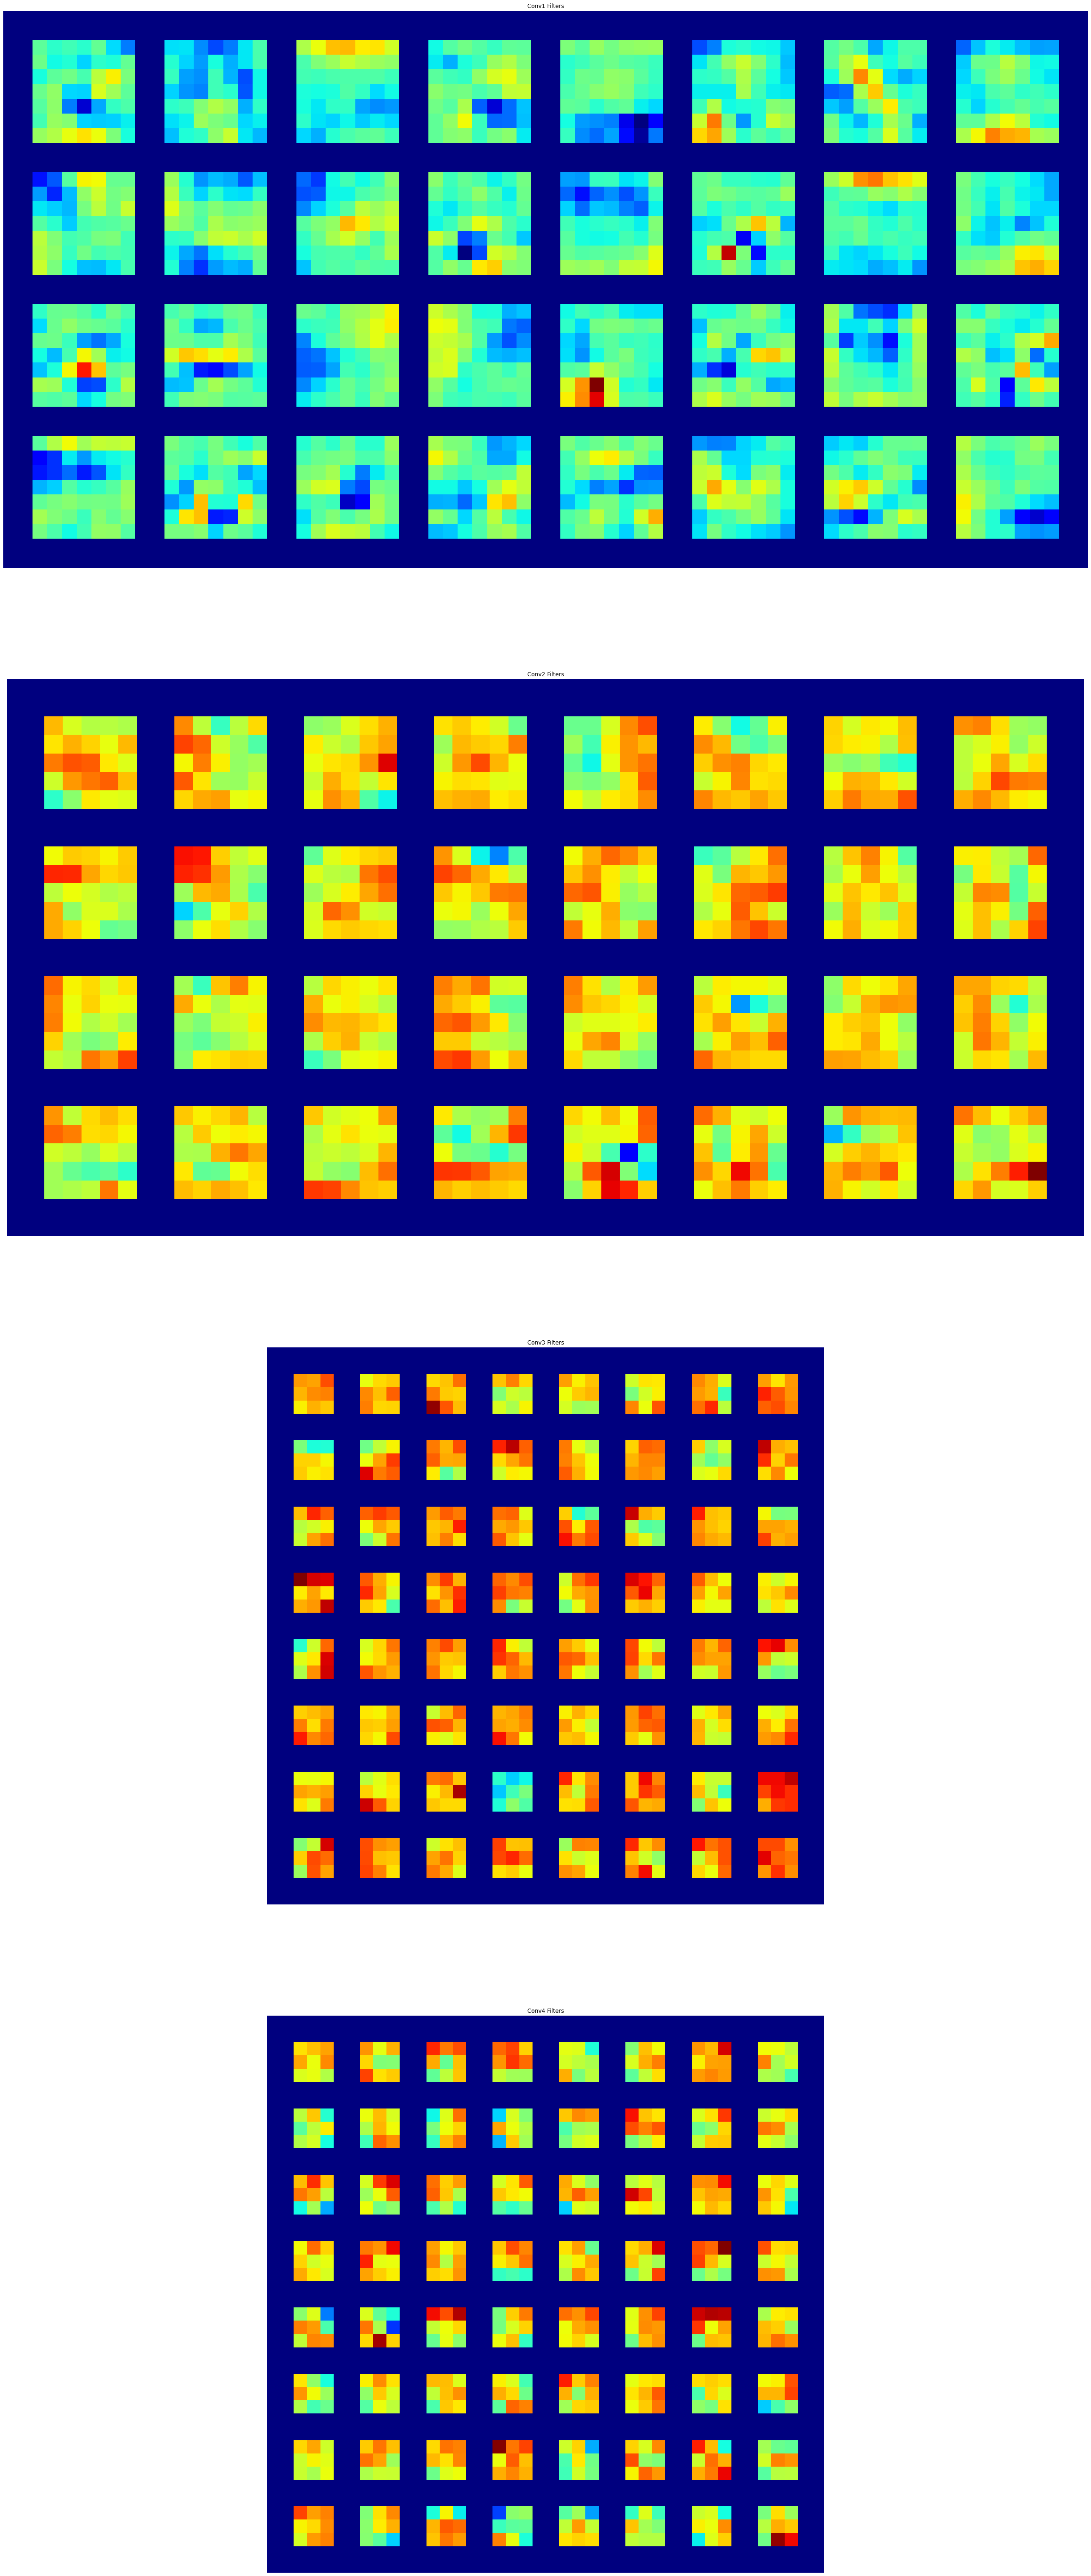

In [19]:
visualize_kernels(model.modules())